# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf
import pylab as pl

%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [2]:
complaints = pd.read_csv(os.getenv('PUIDATA') +'/' +'311_Service_Requests_from_2010_to_Present.csv')
complaints = complaints[['Unique Key','Agency','Complaint Type','Descriptor','Resolution Description','Incident Zip','Community Board','Borough']]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [3]:
# Check if all Boroughs and Community Districts are represented in the Data 
borough = complaints['Borough'].unique()

In [4]:
cb_unique = complaints['Community Board'].unique() 

In [5]:
# How many unique values do we have?
cbcount = np.count_nonzero(cb_unique)
cbcount

74

In [6]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.
complaints = complaints[~complaints['Community Board'].str.contains('Unspecified')]
complaints.head()

,Unique Key,Agency,Complaint Type,Descriptor,Resolution Description,Incident Zip,Community Board,Borough
0,34212771,NYPD,Noise - Residential,Loud Television,The Police Department responded to the complai...,11413.0,13 QUEENS,QUEENS
1,34212392,NYPD,Blocked Driveway,No Access,The Police Department reviewed your complaint ...,10469.0,12 BRONX,BRONX
2,34214520,NYPD,Blocked Driveway,No Access,The Police Department responded and upon arriv...,11369.0,03 QUEENS,QUEENS
3,34212483,NYPD,Blocked Driveway,No Access,The Police Department issued a summons in resp...,10466.0,12 BRONX,BRONX
4,34214231,DOT,Street Condition,Pothole,The Department of Transportation inspected thi...,10040.0,12 MANHATTAN,MANHATTAN


In [7]:
cb_unique = complaints['Community Board'].unique()
cbcount = np.count_nonzero(cb_unique)
cbcount

68

In [8]:
# Check for duplicates? Are these plausible?
complaints.duplicated()
complaints.drop_duplicates()

,Unique Key,Agency,Complaint Type,Descriptor,Resolution Description,Incident Zip,Community Board,Borough
0,34212771,NYPD,Noise - Residential,Loud Television,The Police Department responded to the complai...,11413.0,13 QUEENS,QUEENS
1,34212392,NYPD,Blocked Driveway,No Access,The Police Department reviewed your complaint ...,10469.0,12 BRONX,BRONX
2,34214520,NYPD,Blocked Driveway,No Access,The Police Department responded and upon arriv...,11369.0,03 QUEENS,QUEENS
3,34212483,NYPD,Blocked Driveway,No Access,The Police Department issued a summons in resp...,10466.0,12 BRONX,BRONX
4,34214231,DOT,Street Condition,Pothole,The Department of Transportation inspected thi...,10040.0,12 MANHATTAN,MANHATTAN
5,34223410,DEP,Water System,Hydrant Running Full (WA4),The Department of Environmental Protection det...,10031.0,09 MANHATTAN,MANHATTAN
6,34219357,DSNY,Sanitation Condition,12 Dead Animals,The Department of Sanitation investigated this...,11365.0,08 QUEENS,QUEENS
7,34211394,TLC,Taxi Complaint,Driver Complaint,The Taxi and Limousine Commission will contact...,11103.0,01 QUEENS,QUEENS
8,34217294,NYPD,Noise - Residential,Loud Music/Party,The Police Department responded to the complai...,10468.0,07 BRONX,BRONX
9,34213164,NYPD,Noise - Commercial,Loud Music/Party,The Police Department responded to the complai...,11222.0,01 BROOKLYN,BROOKLYN


In [9]:
# What about missing values? Can you detect any patterns?
complaints[complaints.isnull().any(axis=1)]

,Unique Key,Agency,Complaint Type,Descriptor,Resolution Description,Incident Zip,Community Board,Borough
39,34222268,DEP,Noise,Noise: Jack Hammering (NC2),NaN,10001.0,04 MANHATTAN,MANHATTAN
43,34223699,DEP,Air Quality,"Air: Smoke, Chimney or vent (AS1)",NaN,10009.0,03 MANHATTAN,MANHATTAN
64,34224255,DEP,Noise,Noise: Construction Before/After Hours (NM1),NaN,10039.0,10 MANHATTAN,MANHATTAN
67,34225272,DEP,Noise,Noise: Jack Hammering (NC2),NaN,10001.0,04 MANHATTAN,MANHATTAN
68,34222223,DEP,Noise,Noise: Construction Before/After Hours (NM1),NaN,10001.0,04 MANHATTAN,MANHATTAN
95,34226286,DEP,Noise,Noise: Construction Before/After Hours (NM1),NaN,10021.0,08 MANHATTAN,MANHATTAN
99,34226287,DEP,Noise,Noise: Construction Before/After Hours (NM1),NaN,10028.0,08 MANHATTAN,MANHATTAN
101,34220261,DEP,Noise,Noise: Construction Before/After Hours (NM1),NaN,10028.0,08 MANHATTAN,MANHATTAN
103,34211866,NYPD,Homeless Encampment,NaN,The Police Department responded and upon arriv...,10006.0,01 MANHATTAN,MANHATTAN
111,34210838,DHS,Homeless Person Assistance,NaN,The mobile outreach response team offered serv...,10022.0,05 MANHATTAN,MANHATTAN


In [10]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [11]:
# Generate marker for unplausible Community Districts
# How do these districts look like
for i in cb_unique:
    if int(i[:2]) > 18: 
        print ('Community Board ' + i + ' is Unplausible.')

Community Board 55 BROOKLYN is Unplausible.
Community Board 83 QUEENS is Unplausible.
Community Board 80 QUEENS is Unplausible.
Community Board 82 QUEENS is Unplausible.
Community Board 81 QUEENS is Unplausible.
Community Board 95 STATEN ISLAND is Unplausible.
Community Board 64 MANHATTAN is Unplausible.
Community Board 26 BRONX is Unplausible.
Community Board 27 BRONX is Unplausible.


In [12]:
# Drop the marked districts
complaints = complaints[complaints['Community Board'] != '55 BROOKLYN']
complaints = complaints[complaints['Community Board'] != '83 QUEENS']
complaints = complaints[complaints['Community Board'] != '80 QUEENS']
complaints = complaints[complaints['Community Board'] != '82 QUEENS']
complaints = complaints[complaints['Community Board'] != '81 QUEENS']
complaints = complaints[complaints['Community Board'] != '95 STATEN ISLAND']
complaints = complaints[complaints['Community Board'] != '64 MANHATTAN']
complaints = complaints[complaints['Community Board'] != '26 BRONX']
complaints = complaints[complaints['Community Board'] != '27 BRONX']

In [13]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
complaint_counts = complaints.groupby('Community Board').count()[['Agency']]
complaint_counts.columns = ['Count']
complaint_counts['Rank'] = complaint_counts['Count'].rank()

In [14]:
# Save data frame
complaint_counts.sort('Count')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Count,Rank
Community Board,,
02 BRONX,219,1.0
13 BROOKLYN,261,2.0
01 BRONX,280,3.0
06 QUEENS,289,4.0
03 BRONX,294,5.0
11 QUEENS,310,6.0
16 BROOKLYN,346,7.0
01 MANHATTAN,353,8.0
06 BRONX,366,9.0


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [15]:
# Population by Community District
population = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [16]:
# Check variables in file
population.columns

Index(['FIPS', 'cd_id', 'Total Population',
       'Population Density (per sq. mile)', '% Total Population: Male',
       '% Total Population: 18 to 24 Years',
       '% Total Population: 25 to 34 Years',
       '% Total Population: 35 to 44 Years',
       '% Population 5 Years And Over: Speak Only English',
       '% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       '% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       '% Employed Civilian Population 16 Years And Over: Service occupations',
       '% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       '% Employed Civ

In [17]:
# How many community districts are in file? 
population_cb = population['cd_id'].unique()
np.count_nonzero(population_cb)

59

In [18]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
population['PerCapitaIncome'] = population['Per capita income (In 2014 Inflation Adjusted Dollars)']
population = population[['cd_id','Total Population','Population Density (per sq. mile)','PerCapitaIncome']]
population.head()

,cd_id,Total Population,Population Density (per sq. mile),PerCapitaIncome
0,BX08,106737,31229.95006,30730
1,BX12,134644,19966.67839,21523
2,BX10,121209,12913.81703,28586
3,BX11,135839,35677.95453,22714
4,BX03,172247,39405.79222,12662


In [19]:
# Save data frame

In [20]:
# Infrastructure by Community District
infrastructure = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [21]:
# Check variables in file
infrastructure.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [22]:
# How many community districts are in file? 
infra_unique = infrastructure['Qualifying Name'].unique()
np.count_nonzero(infra_unique)

55

In [23]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
infrastructure['Mobile_Broadband'] = (infrastructure['Households: With Mobile Broadband'] + 
                                                    infrastructure['Households: With Mobile Broadband.1'] + 
                                                    infrastructure['Households: With Mobile Broadband.2'] + 
                                                    infrastructure['Households: With Mobile Broadband.3'] + 
                                                    infrastructure['Households: With Mobile Broadband.4'])

infrastructure['No_Mobile_Broadband'] = (infrastructure['Households: Without Mobile Broadband'] + 
                                                    infrastructure['Households: Without Mobile Broadband.1']+ 
                                                    infrastructure['Households: Without Mobile Broadband.2']+
                                                    infrastructure['Households: Without Mobile Broadband.3']+
                                                    infrastructure['Households: Without Mobile Broadband.4'])

In [24]:
# Aggregate internet type by high and low connections
infrastructure['High_Speed'] = infrastructure['Households: With A Broadband Internet Subscription']  

infrastructure['Low_Speed'] = (infrastructure['Households: With Dial-Up Internet Subscription Alone'] + 
                               infrastructure['Households: Mobile Broadband Alone or With Dialup']) 

In [25]:
# Save data frame 
infrastructure = infrastructure[['Qualifying Name', 'Mobile_Broadband', 'No_Mobile_Broadband', 
                                 'High_Speed','Low_Speed']]
infrastructure

,Qualifying Name,Mobile_Broadband,No_Mobile_Broadband,High_Speed,Low_Speed
0,"NYC-Bronx Community District 8--Riverdale, New...",15359,13824,30943,2572
1,"NYC-Bronx Community District 12--Wakefield, Ne...",10486,20651,31435,1106
2,"NYC-Bronx Community District 10--Co-op City, N...",11425,20507,32333,797
3,NYC-Bronx Community District 11--Pelham Parkwa...,10748,20113,31278,1123
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",14907,19123,33408,1473
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",14907,19123,33408,1473
6,"NYC-Bronx Community District 7--Bedford Park, ...",15085,14759,31021,1624
7,NYC-Bronx Community District 5--Morris Heights...,14795,10421,25772,1116
8,"NYC-Bronx Community District 4--Concourse, New...",15968,10718,27971,2690
9,"NYC-Bronx Community District 9--Castle Hill, N...",11229,32904,45261,1843


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [26]:
# Harmonize identifier of dataframe 1

borough = {'BRONX':'BX', 'MANHATTAN':'MN', 'STATEN ISLAND':'SI', 'BROOKLYN':'BK', 'QUEENS':'QN'}

for i in complaint_counts:
    complaint_counts['cd_id'] = [borough[i[3:]] + i[:2] for i in complaint_counts.index]

complaint_counts.head()

,Count,Rank,cd_id
Community Board,,,
01 BRONX,280,3.0,BX01
01 BROOKLYN,791,52.0,BK01
01 MANHATTAN,353,8.0,MN01
01 QUEENS,687,46.0,QN01
01 STATEN ISLAND,659,43.0,SI01


In [27]:
# Harmonize identifier of dataframe 2
population.head()

,cd_id,Total Population,Population Density (per sq. mile),PerCapitaIncome
0,BX08,106737,31229.95006,30730
1,BX12,134644,19966.67839,21523
2,BX10,121209,12913.81703,28586
3,BX11,135839,35677.95453,22714
4,BX03,172247,39405.79222,12662


In [28]:
# Harmonize identifier of dataframe 3

boroughs = {'Bronx': 'BX', 'Brooklyn': 'BK', 'Manhattan': 'MN', 'Staten': 'SI', 'Queens': 'QN'}

def complete_cd_id(digit):
    if len(digit) == 1:
        return '0' + digit[0]
    else:
        return digit 

for i in infrastructure['Qualifying Name']:
    infrastructure['cd_digit'] = [re.search('[\d]+', i).group() for i in infrastructure['Qualifying Name']]
    infrastructure['Borough'] = [boroughs[re.search('[^\s]+', i[4:]).group()] for i in infrastructure['Qualifying Name']]
    infrastructure['cd_digit'] = [complete_cd_id(i) for i in infrastructure['cd_digit']]
    infrastructure['cd_id'] = (infrastructure['Borough'] + infrastructure['cd_digit'])

infrastructure = infrastructure[['cd_id','Mobile_Broadband','No_Mobile_Broadband',
                                'High_Speed','Low_Speed']]

infrastructure.drop_duplicates()
infrastructure.head()

,cd_id,Mobile_Broadband,No_Mobile_Broadband,High_Speed,Low_Speed
0,BX08,15359,13824,30943,2572
1,BX12,10486,20651,31435,1106
2,BX10,11425,20507,32333,797
3,BX11,10748,20113,31278,1123
4,BX03,14907,19123,33408,1473


In [29]:
### Link the 3 dataframes
final = pd.merge(complaint_counts, population, on = 'cd_id')
final = pd.merge(final, infrastructure, on = 'cd_id')
final.head()

,Count,Rank,cd_id,Total Population,Population Density (per sq. mile),PerCapitaIncome,Mobile_Broadband,No_Mobile_Broadband,High_Speed,Low_Speed
0,280,3.0,BX01,167147,34412.07524,11370,14979,16732,30958,1002
1,280,3.0,BX01,167147,34412.07524,11370,14979,16732,30958,1002
2,791,52.0,BK01,154713,37671.51058,34897,19516,25105,46148,2392
3,353,8.0,MN01,159903,53928.05360,105300,39655,33112,74339,1927
4,353,8.0,MN01,159903,53928.05360,105300,39655,33112,74339,1927


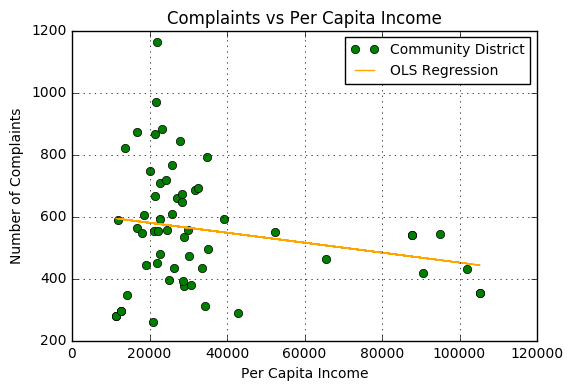

In [30]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
model = smf.ols('Count ~ PerCapitaIncome', data = final).fit()

pl.plot(final['PerCapitaIncome'], final['Count'],'o', color = 'green', label = 'Community District')
pl.ylabel('Number of Complaints')
pl.xlabel('Per Capita Income')
pl.title('Complaints vs Per Capita Income')

pl.plot(final['PerCapitaIncome'], model.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 1: The figure above shows the number of complaints per community districts vs per capita income. Complaints appear to be more common amongst districts with lower per capita incomes. Wealthier districts appear to have far fewer complaints. 

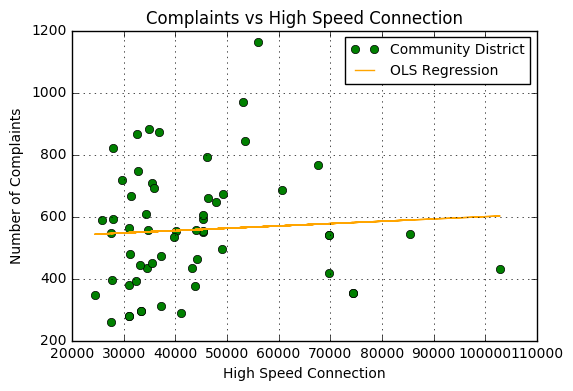

In [31]:
model0 = smf.ols('Count ~ High_Speed', data = final).fit()

pl.plot(final['High_Speed'], final['Count'],'o', color = 'green', label = 'Community District')
pl.ylabel('Number of Complaints')
pl.xlabel('High Speed Connection')
pl.title('Complaints vs High Speed Connection')

pl.plot(final['High_Speed'], model0.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 2: The figure above shows the number of complaints per community districts vs households with high speed internet connection. Complaints appear to be more common amongst districts with lower speed internet connection. Districts with higher internet speeds appear to have far fewer complaints. 

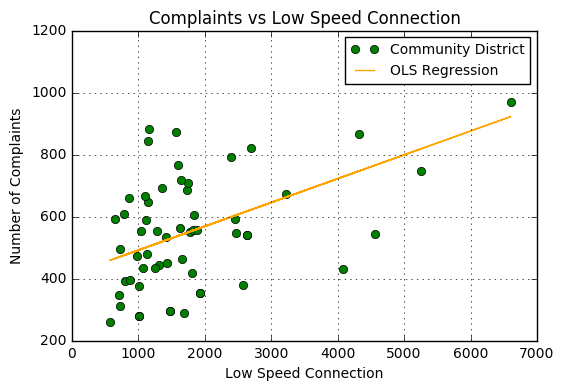

In [32]:
model2 = smf.ols('Count ~ Low_Speed', data = final).fit()

pl.plot(final['Low_Speed'], final['Count'],'o', color = 'green', label = 'Community District')
pl.ylabel('Number of Complaints')
pl.xlabel('Low Speed Connection')
pl.title('Complaints vs Low Speed Connection')

pl.plot(final['Low_Speed'], model2.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 3: The figure above shows the number of complaints per community districts vs households with low speed internet connection. Complaints appear to be more common amongst districts with lower speed internet connection. Districts with higher internet speeds appear to have far fewer complaints. 